# Aim

To find mobile apps that are profitable for the app store and google play markets. To analyze data to find what kind of free apps to develop as our focus is to generate revenue from in-app ads



# Data Set

As there are several million apps avaiable, to collect and analyze the data is difficult. So, we work on limited data available.

https://www.kaggle.com/lava18/google-play-store-apps

https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps

Let load our data and explore the sets.

In [1]:
from csv import reader

### The Google Play data set ###
opened_file = open('googleplaystore.csv', encoding='UTF8')
read_file = reader(opened_file)
android = list(read_file)
android_header = android[0]
android = android[1:]

### The App Store data set ###
opened_file = open('AppleStore.csv', encoding='UTF8')
read_file = reader(opened_file)
ios = list(read_file)
ios_header = ios[0]
ios = ios[1:]

Create a function to explore data sets and we can use this function repeatedly

Below we explore android data set

In [2]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') 
        
    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

print(android_header)
print('\n')
explore_data(android, 0, 3, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


Columns that might be useful for the purpose of our analysis are 'App', 'Category', 'Reviews', 'Installs', 'Type', 'Price', and 'Genres'.

Below we explore IOS data set

In [3]:
print(ios_header)
print('\n')
explore_data(ios, 0, 3, True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 7197
Number of columns: 16


Columns that seem interesting are: 'track_name', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', and 'prime_genre'.

## Deleting Wrong Data

From the kaggle discussion for the data set we can observe the row 10472 having some error let's explore and delete if needed

In [4]:
print(android[10472])  # incorrect row
print('\n')
print(android_header)  # header
print('\n')
print(android[0])  #Example

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


We can see a column missing so lets delete the row

In [5]:
print(len(android))
del android[10472]  # don't run this more than once
print(len(android))

10841
10840


# Deleting Duplicate Apps

Let's find the duplicate apps and separate them

In total, there are 1,181 cases where an app occurs more than once:

In [6]:
duplicate_apps = []
unique_apps = []

for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
    
print('Number of duplicate apps:', len(duplicate_apps))
print('\n')
print('Examples of duplicate apps:', duplicate_apps[:15])

Number of duplicate apps: 1181


Examples of duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


We will keep only the apps with the max reviews

In [7]:
reviews_max = {}

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
        
    elif name not in reviews_max:
        reviews_max[name] = n_reviews

In [8]:
print(dict(list(reviews_max.items())[:4]))
print('\n')
print('Expected length:', len(android) - 1181)
print('Actual length:', len(reviews_max))

{'Photo Editor & Candy Camera & Grid & ScrapBook': 159.0, 'Coloring book moana': 974.0, 'U Launcher Lite – FREE Live Cool Themes, Hide Apps': 87510.0, 'Sketch - Draw & Paint': 215644.0}


Expected length: 9659
Actual length: 9659


Using the dictionary we will filter the data 

In [9]:
android_clean = []
already_added = []

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    
    if (reviews_max[name] == n_reviews) and name not in already_added:
        android_clean.append(app)
        already_added.append(name) #this helps to get rid of apps with same veviews
len(android_clean)

9659

let's confirm that the number of rows is 9,659

In [10]:
explore_data(android_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


Explore and removing any non-english apps

In [11]:
print(ios[813][1])
print(ios[6731][1])

print(android_clean[4412][0])
print(android_clean[7940][0])

爱奇艺PPS -《欢乐颂2》电视剧热播
【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜
中国語 AQリスニング
لعبة تقدر تربح DZ


Test function to check non-english apps

In [12]:
def is_english(string):
    
    for character in string:
        if ord(character) > 127:
            return False
    
    return True

print(is_english('Instagram'))
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
False


Above function works fine but we have chances of missing few apps with trademarks, emojis etc though they are english apps 

In [13]:
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))
print(is_english('Chaitanya'))

print(ord('™'))
print(ord('😜'))

False
False
True
8482
128540


To minimize the impact of data loss, we'll only remove an app if its name has more than three non-ASCII characters:

In [14]:
def is_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
    
    if non_ascii > 3:
        return False
    else:
        return True

print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))
print(is_english('Instachat 😜😜😜😜'))

True
True
False


we use the above function to filter the data

In [15]:
android_english = []
ios_english = []

for app in android_clean:
    name = app[0]
    if is_english(name):
        android_english.append(app)
        
for app in ios:
    name = app[1]
    if is_english(name):
        ios_english.append(app)
        
explore_data(android_english, 0, 3, True)
print('\n')
explore_data(ios_english, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9614
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 

Since our focus is on free apps let's filter the same

In [16]:
android_final = []
ios_final = []

for app in android_english:
    price = app[7]
    if price == '0':
        android_final.append(app)
        
for app in ios_english:
    price = app[4]
    if price == '0.0':
        ios_final.append(app)
        
print(len(android_final))
print(len(ios_final))

8864
3222


We create a functions to explore the most frequent categories sorted descending to ascending

In [17]:
def freq_table(dataset, index):
    table = {}
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
    
    table_percentages = {}
    for key in table:
        percentage = (table[key] / total) * 100
        table_percentages[key] = percentage 
    
    return table_percentages


def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
    print(table_display[:2])    
    print('\n')
    table_sorted = sorted(table_display, reverse = True)
    print(table_sorted[:2])
    print('\n')
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

Let's explore genres column in IOS

In [18]:
display_table(ios_final, -5)

[(3.2898820608317814, 'Social Networking'), (4.9658597144630665, 'Photo & Video')]


[(58.16263190564867, 'Games'), (7.883302296710118, 'Entertainment')]


Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


Above we can see the games category we have more apps let's see if the usage is the same for android

Let's explore category in android

In [19]:
display_table(android_final, 1) 

[(0.6430505415162455, 'ART_AND_DESIGN'), (0.9250902527075812, 'AUTO_AND_VEHICLES')]


[(18.907942238267147, 'FAMILY'), (9.724729241877256, 'GAME')]


FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.92509025

Upon investigating the family apps seems to be games apps mostly

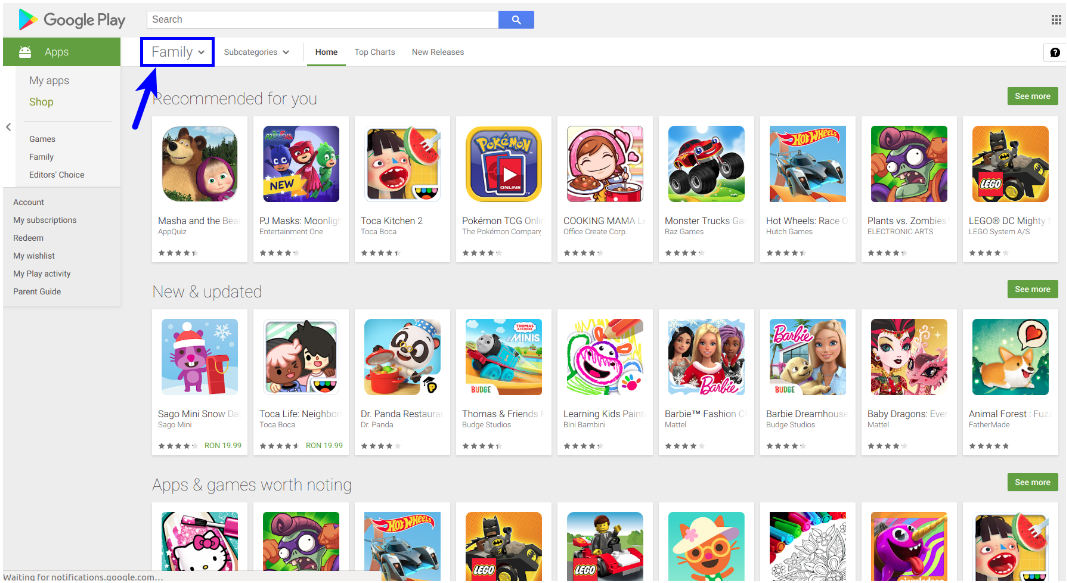

Let's explore genres in adroid

In [20]:
display_table(android_final, -4)

[(0.5979241877256317, 'Art & Design'), (0.06768953068592057, 'Art & Design;Creativity')]


[(8.449909747292418, 'Tools'), (6.069494584837545, 'Entertainment')]


Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115524
Sports : 3.463447653429603
Personalization : 3.3167870036101084
Communication : 3.2378158844765346
Action : 3.1024368231046933
Health & Fitness : 3.0798736462093865
Photography : 2.944494584837545
News & Magazines : 2.7978339350180503
Social : 2.6624548736462095
Travel & Local : 2.3240072202166067
Shopping : 2.2450361010830324
Books & Reference : 2.1435018050541514
Simulation : 2.0419675090252705
Dating : 1.861462093862816
Arcade : 1.8501805054151623
Video Players & Editors : 1.7712093862815883
Casual : 1.7599277978339352
Maps & Navigation : 1.3989169675090252
Food & Drink : 1.240974729241877

Android store seems more balanced from genres

Let's caluculate genres avg rating in IOs

In [21]:
genres_ios = freq_table(ios_final, -5)

for genre in genres_ios:
    total = 0
    len_genre = 0
    for app in ios_final:
        genre_app = app[-5]
        if genre_app == genre:            
            n_ratings = float(app[5])
            total += n_ratings
            len_genre += 1
    avg_n_ratings = total / len_genre
    print(genre, ':', avg_n_ratings)

Social Networking : 71548.34905660378
Photo & Video : 28441.54375
Games : 22788.6696905016
Music : 57326.530303030304
Reference : 74942.11111111111
Health & Fitness : 23298.015384615384
Weather : 52279.892857142855
Utilities : 18684.456790123455
Travel : 28243.8
Shopping : 26919.690476190477
News : 21248.023255813954
Navigation : 86090.33333333333
Lifestyle : 16485.764705882353
Entertainment : 14029.830708661417
Food & Drink : 33333.92307692308
Sports : 23008.898550724636
Book : 39758.5
Finance : 31467.944444444445
Education : 7003.983050847458
Productivity : 21028.410714285714
Business : 7491.117647058823
Catalogs : 4004.0
Medical : 612.0


From the above we can observe the navigation and reference have the highest avg rating, let's explore them

In [22]:
for app in ios_final:
    if app[-5] == 'Navigation':
        print(app[1], ':', app[5]) 

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


Navigation is highly influenced by navigation and google maps

In [23]:
for app in ios_final:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0


Reference is highly influenced by dictionary and bible apps, mostly they are books

We can work on some poupular books as apps (audio, video, quizess, quotes etc.,) for IOS store

Let' analyze android market. calculate genres avg rating in Andorid

In [24]:
categories_android = freq_table(android_final, 1)

for category in categories_android:
    total = 0
    len_category = 0
    for app in android_final:
        category_app = app[1]
        if category_app == category:            
            n_installs = app[5]
            n_installs = n_installs.replace(',', '')
            n_installs = n_installs.replace('+', '')
            total += float(n_installs)
            len_category += 1
    avg_n_installs = total / len_category
    print(category, ':', avg_n_installs)

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8767811.894736841
BUSINESS : 1712290.1474201474
COMICS : 817657.2727272727
COMMUNICATION : 38456119.167247385
DATING : 854028.8303030303
EDUCATION : 1833495.145631068
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1331540.5616438356
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1437816.2687861272
GAME : 15588015.603248259
FAMILY : 3695641.8198090694
MEDICAL : 120550.61980830671
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17840110.40229885
SPORTS : 3638640.1428571427
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10801391.298666667
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5074486.197183099
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_

Let's explore communication genre with the mose ratings

In [25]:
for app in android_final:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

The rating is heavily skewed up by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts), and a few others with over 100 and 500 million installs:

If we removed all the communication apps that have over 100 million installs, the average would be reduced

In [26]:
under_100_m = []

for app in android_final:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'COMMUNICATION') and (float(n_installs) < 100000000):
        under_100_m.append(float(n_installs))
        
sum(under_100_m) / len(under_100_m)

3603485.3884615386

Let's explore books and reference 

In [27]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

We have lot of apps to have glance so let's extract by the highest ratings

In [28]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+'
                                            or app[5] == '500,000,000+'
                                            or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+


However, it looks like there are only a few very popular apps, so this market still shows potential. Let's try to get some app ideas based on the kind of apps that are somewhere in the middle in terms of popularity (between 1,000,000 and 100,000,000 downloads):

In [29]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+'
                                            or app[5] == '5,000,000+'
                                            or app[5] == '10,000,000+'
                                            or app[5] == '50,000,000+'):
        print(app[0], ':', app[5])

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H

From android stores we can observe there are books on bible, quran, dictionary etc., For android also we can come up with popular books.


# conclusion

From both Android and IOS apps we can conclude building apps based on popular books can give us good downloads. 